<a href="https://colab.research.google.com/github/abhi-kr-210/Image-Classification-using_CNN/blob/main/Cats%20and%20Dogs%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:09<00:00, 128MB/s]
100% 1.06G/1.06G [00:09<00:00, 119MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
# create CNN model

model = Sequential()

model.add(Conv2D(96,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(96,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 144s 209ms/step - loss: 1.0395 - accuracy: 0.5432 - val_loss: 0.6520 - val_accuracy: 0.6054
Epoch 2/5
625/625 [==============================] - 130s 206ms/step - loss: 0.6248 - accuracy: 0.6461 - val_loss: 0.6968 - val_accuracy: 0.6094
Epoch 3/5
625/625 [==============================] - 128s 205ms/step - loss: 0.5472 - accuracy: 0.7178 - val_loss: 0.5600 - val_accuracy: 0.7102
Epoch 4/5
625/625 [==============================] - 130s 207ms/step - loss: 0.4706 - accuracy: 0.7770 - val_loss: 0.5006 - val_accuracy: 0.7540
Epoch 5/5
625/625 [==============================] - 129s 205ms/step - loss: 0.4034 - accuracy: 0.8202 - val_loss: 0.4303 - val_accuracy: 0.7998


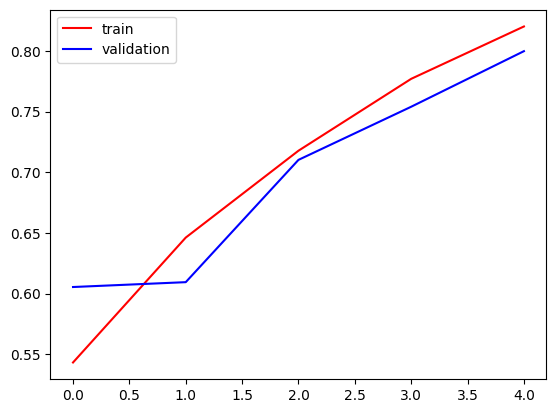

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

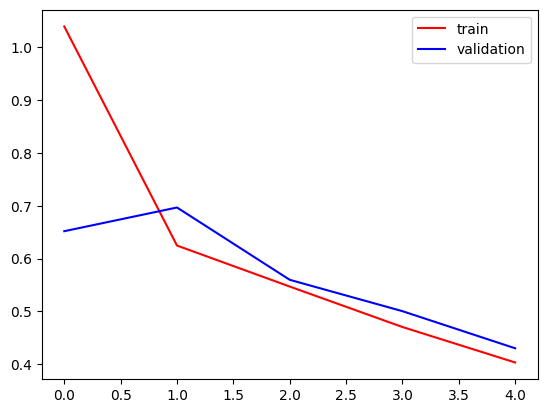

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2

In [15]:
test_img = cv2.imread('/content/dog.jpg')

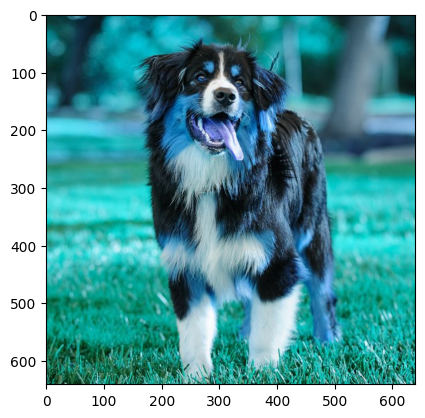

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(641, 640, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape((1,256,256,3))

In [20]:
model.predict(test_input)

1/1 [==============================] - 1s 529ms/step


array([[1.]], dtype=float32)

In [21]:
test_img1 = cv2.imread('/content/cat.jpeg')

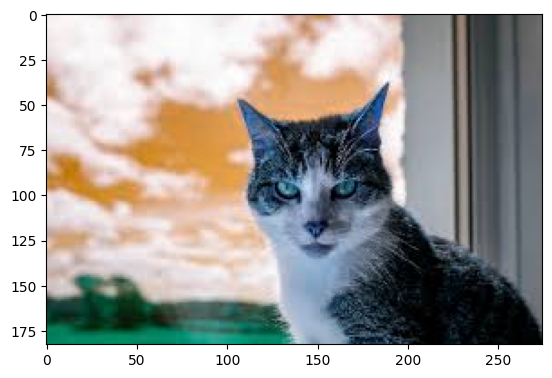

In [22]:
plt.imshow(test_img1)

In [23]:
test_img1.shape

(183, 275, 3)

In [24]:
test_img1 = cv2.resize(test_img1,(256,256))

In [25]:
test_input1 = test_img1.reshape((1,256,256,3))

In [26]:
model.predict(test_input1)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [27]:
model = Sequential()

model.add(Conv2D(96,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(96,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
625/625 [==============================] - 136s 209ms/step - loss: 0.6776 - accuracy: 0.5985 - val_loss: 0.6660 - val_accuracy: 0.6060
Epoch 2/15
625/625 [==============================] - 131s 209ms/step - loss: 0.5455 - accuracy: 0.7250 - val_loss: 0.6190 - val_accuracy: 0.6994
Epoch 3/15
625/625 [==============================] - 130s 207ms/step - loss: 0.4390 - accuracy: 0.8006 - val_loss: 0.4886 - val_accuracy: 0.7496
Epoch 4/15
625/625 [==============================] - 131s 209ms/step - loss: 0.3508 - accuracy: 0.8472 - val_loss: 0.3558 - val_accuracy: 0.8436
Epoch 5/15
625/625 [==============================] - 130s 207ms/step - loss: 0.2535 - accuracy: 0.8971 - val_loss: 0.4540 - val_accuracy: 0.8236
Epoch 6/15
625/625 [==============================] - 130s 208ms/step - loss: 0.1631 - accuracy: 0.9342 - val_loss: 0.4401 - val_accuracy: 0.8592
Epoch 7/15
625/625 [==============================] - 129s 205ms/step - loss: 0.1030 - accuracy: 0.9617 - val_loss: 0.6843 -

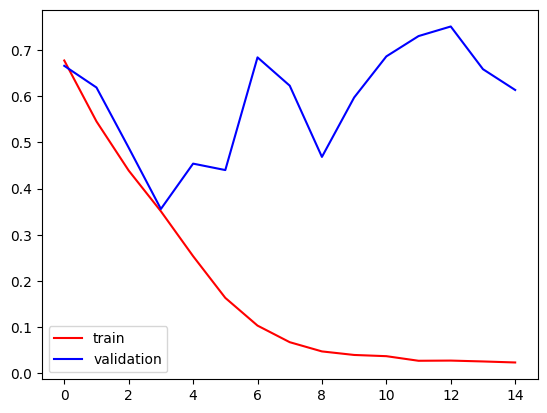

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

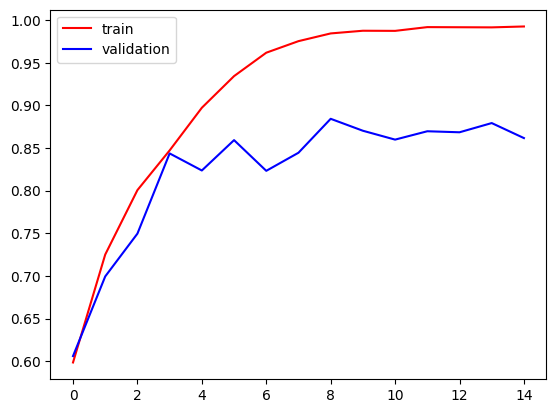

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [33]:
model.predict(test_input1)

1/1 [==============================] - 0s 406ms/step


array([[1.]], dtype=float32)

In [34]:
test_img2 = cv2.imread('/content/cat1.jpeg')

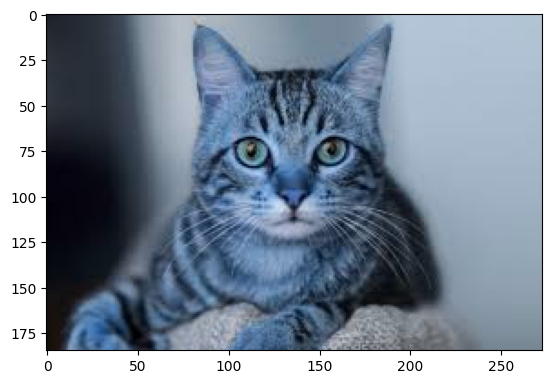

In [35]:
plt.imshow(test_img2)

In [36]:
test_img2.shape

(185, 273, 3)

In [37]:
test_img2 = cv2.resize(test_img2,(256,256))

In [38]:
test_input2 = test_img2.reshape((1,256,256,3))

In [39]:
model.predict(test_input2)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)